In [3]:
from typing import Annotated, List
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [4]:
class State(TypedDict):
    messages:Annotated[List, "List of messages in the conversation"]
    # messages: List[Dict[str, Any]]
    # user_input: str
    # response: str

graph_builder = StateGraph(State)

In [5]:
graph_builder

In [6]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [7]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

llm = ChatGroq(model="meta-llama/llama-4-scout-17b-16e-instruct", temperature=0.0)
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x115a21880>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x115a48e80>, model_name='meta-llama/llama-4-scout-17b-16e-instruct', temperature=1e-08, model_kwargs={}, groq_api_key=SecretStr('**********'))

In [8]:
def chatbot(state: State) -> State:
    return {"messages":[llm.invoke(state["messages"])]}
    # user_input = state.get("user_input", "")
    # if not user_input:
    #     return state

    # messages = state.get("messages", [])
    # messages.append({"role": "user", "content": user_input})

    # response = llm(messages)
    # messages.append({"role": "assistant", "content": response.content})

    # state["messages"] = messages
    # state["response"] = response.content
    # return state

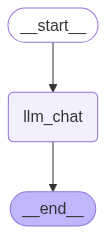

In [9]:
# Adding Nodes
graph_builder.add_node("llm_chat", chatbot)

## Adding Edges
graph_builder.add_edge(START, "llm_chat")
graph_builder.add_edge("llm_chat", END)

## compile the graph
graph_builder.compile()